# (shallow) Neural Network 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_train = np.expand_dims(y_train, axis=1) 
y_test = np.expand_dims(y_test, axis=1) 

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000, 1)
(10000, 28, 28) (10000, 1)


## Select two numbers

In [5]:
number1, class1 =  (0, 0)
number2, class2 = (1, 1)

In [6]:
train_indeces_n1n2 = list( map( lambda x: True if x==number1 or x== number2 else False, y_train ) )

y_train = y_train[ train_indeces_n1n2,: ]
x_train = x_train[ train_indeces_n1n2,:,: ]
print(x_train.shape, y_train.shape)

(12665, 28, 28) (12665, 1)


In [7]:
test_indeces_n1n2 = list( map( lambda x: True if x==number1 or x== number2 else False, y_test ) )

y_test = y_test[ test_indeces_n1n2, : ]
x_test = x_test[ test_indeces_n1n2, :, : ]
print(x_test.shape, y_test.shape)

(2115, 28, 28) (2115, 1)


## Play with the data

In [8]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (12665, 28, 28) (12665, 1)
Test data:  (2115, 28, 28) (2115, 1)


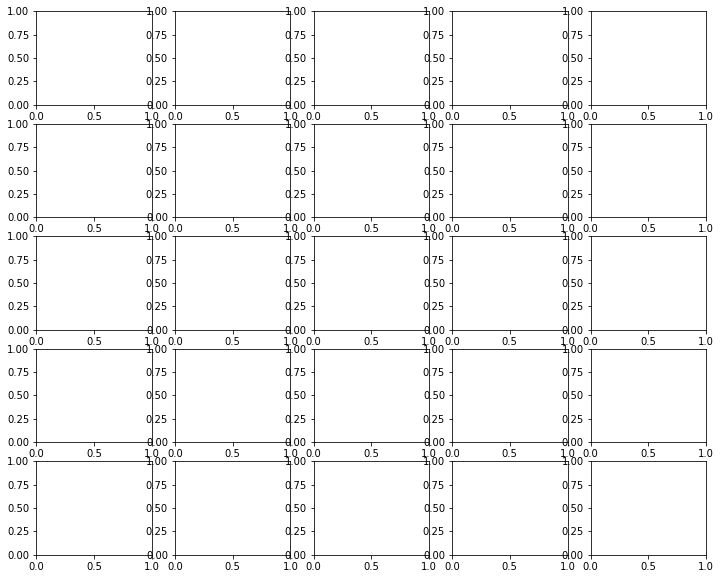

In [9]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [10]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [11]:
index = 0;
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index], cmap='gray')
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

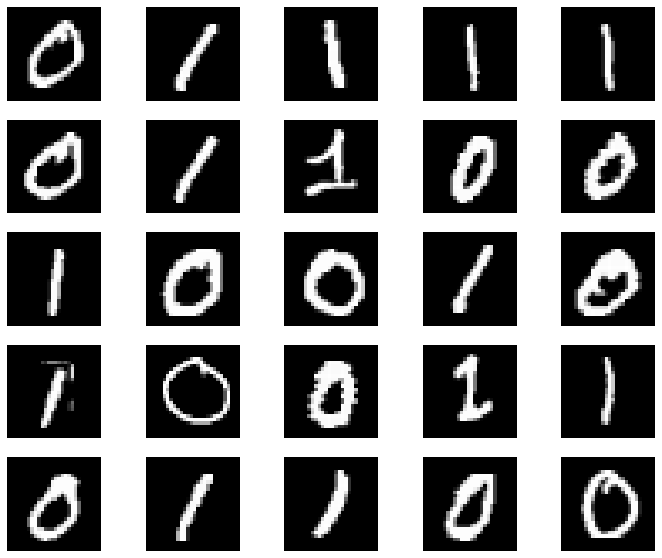

In [12]:
fig1

## Prepare the data

In [13]:
x_train, x_test = x_train/255.0, x_test / 255.0

In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] )
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2] )

In [15]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (12665, 784) (12665, 1)
Test data:  (2115, 784) (2115, 1)


## Build the model

In [28]:
def shallow_NN( X, Y, lr, epochs, nh1=128):
  # Number of observations
  m  = X.shape[1]

  # Define layers (nl)
  n0 = X.shape[0]
  n1 = nh1
  n2 = 1

  # Initialize W1, b1, W2, b2
  A0 = X
  W1 = np.random.randn( n1, n0 ) + 0.01
  b1 = np.zeros( (n1, 1) )

  W2 = np.random.randn( n2, n1 ) + 0.01
  b2 = np.zeros( (n2, 1) )

  loss = []
  for i in range(epochs):

    # Forward propagation
    # layer 1
    Z1 = W1 @ A0 + b1
    A1 = np.tanh(Z1)

    # layer 2
    Z2 = W2 @ A1 + b2
    A2 = (1.0 + np.exp(-Z2))**(-1)

    # Backpropagation
    dZ2 = A2 - Y
    dW2 = (1.0 / m ) * ( dZ2 @ A1.T )
    db2 = (1.0 / m )* np.sum(dZ2, axis=1, keepdims=True )

    dZ1 = ( W2.T @ dZ2 ) * ( 1.0 - A1**2)
    dW1 = (1.0 / m ) * ( dZ1 @ A0.T )
    db1 = (1.0 / m )* np.sum(dZ1, axis=1, keepdims=True )

    # Update weights
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2

    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1

    # Compute loss
    loss.append( (-1.0/ m) * np.sum( Y*np.log(np.abs(A2)+0.00000001) + (1.0 -Y)*np.log(np.abs(1.0 - A2))+0.00000001) )
    print(i, loss[-1])
  
  return {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'loss': loss
  }

## Train the model

In [29]:
result = shallow_NN( X= x_train.T , Y=y_train.T, lr=0.5, epochs=100, nh1=128)

0 3.845281191283907
1 0.7251519285562172
2 0.19697546149647108
3 0.14948357830428707
4 0.12291711113700815
5 0.10600123101643931
6 0.09412470832703056
7 0.08529967493895567
8 0.07849891951827241
9 0.0731003326599752
10 0.06870578671884171
11 0.06505433674740901
12 0.061965216984598545
13 0.05930615670593661
14 0.05697935095586767
15 0.054913466465323336
16 0.053056640284270484
17 0.05137061997392738
18 0.04982655108363821
19 0.0484021750869193
20 0.04707998866292739
21 0.04584601375670701
22 0.044688954741093946
23 0.04359960445381906
24 0.04257041242423524
25 0.04159516030147302
26 0.040668709419588694
27 0.0397867979623253
28 0.038945873191662955
29 0.03814294964154874
30 0.03737548815571464
31 0.036641293525786364
32 0.03593843016523499
33 0.035265155602818406
34 0.034619870806958254
35 0.03400108510461514
36 0.0334073925264672
37 0.03283745628063381
38 0.03228999868129098
39 0.03176379480034993
40 0.03125766890145024
41 0.030770493120731043
42 0.03030118791594477
43 0.0298487237006

## Evaluate the model

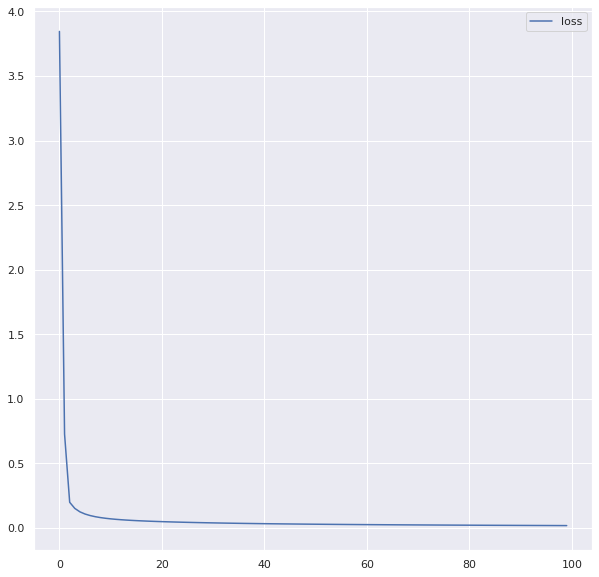

In [30]:
plt.plot(result['loss'], label='loss')
plt.legend()

## Make predictions

In [22]:
def predict( results, X ):

  A0 = X
  W1 = results['W1']
  b1 = results['b1']

  W2 = results['W2']
  b2 = results['b2']

  # Forward propagation
  Z1 = W1 @ A0 + b1
  A1 = np.tanh(Z1)

  Z2 = W2 @ A1 + b2
  A2 = ( 1.0 + np.exp(-Z2) )**(-1) 

  yhat = np.around(A2)
  return yhat

In [31]:
y_test_hat = predict(result, x_test.T)

In [32]:
cm = confusion_matrix(y_test, y_test_hat.T)

In [33]:
cm

array([[ 975,    5],
       [   4, 1131]])

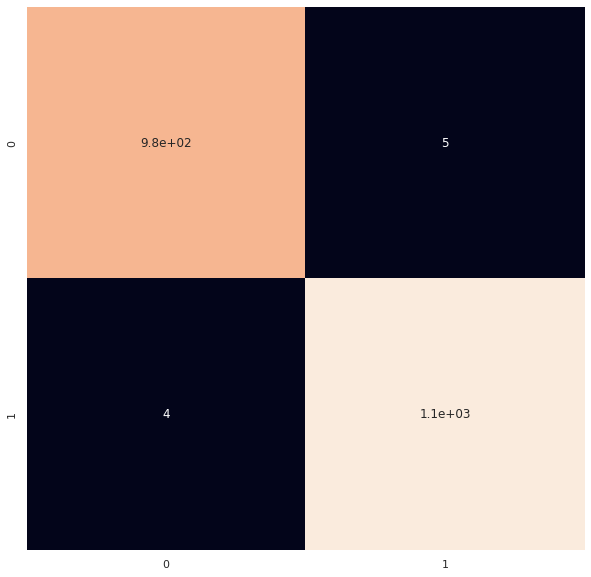

In [34]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm,annot=True,cbar=False)

In [35]:
print('Acc: ', np.sum(y_test_hat.T == y_test)/y_test.shape[0])

Acc:  0.9957446808510638


In [36]:
y_train_hat = predict(result, x_train.T)

In [37]:
print('Acc: ', np.sum(y_train_hat.T == y_train)/y_train.shape[0])

Acc:  0.9955783655744177
